# Texas Licenses

I originally got this dataset from the [License Files page](https://www.license.state.tx.us/licensesearch/licfile.asp) from the Texas Department of Licensing and Regulation, but they've changed around since then! I'm pretty sure it's [this dataset](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but we'll just use a local version instead of the most current.

# PART ONE: OPENING UP OUR DATASET

## 0. Do your setup

Import what you need to import, etc.

In [2]:
import pandas as pd

## 1. Open the file

We'll start with `licfile.csv`, which is a list of licenses.

In [3]:
df = pd.read_csv("licfile.csv")
df.head()

/Users/ALukpat/.pyenv/versions/3.7.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,08102017,"RISINGER, JIM MARVIN.1",7668 S US HWY 59,Unnamed: 11,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,Unnamed: 17,N
0,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
1,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
2,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
3,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N
4,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,5042017,"THOMPSON, RANDY D",10995 BELLEVILLE RD,NaN,RINGLING OK 73456,999.0,OUT OF STATE,73456,5802765961,NaN,N


## 2. That looks terrible, let's add column names.

It apparently doesn't have headers! **Read the file in again, but setting your own column names**. Their [current data dictionary might not perfectly match](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but you can use it to understand what the columns are. For the dataset we're using, the order goes like this:

* LICTYPE
* LICNUMBER
* BIZCOUNTY
* BIZNAME
* BIZLINE1
* BIZLINE2
* BIZCITYSTATE
* BIZTELEPHONE
* EXPIRATION
* OWNER
* MAILLINE1
* MAILLINE2
* MAILCITYSTATE
* MAILCOUNTYCODE
* MAILCOUNTY
* MAILZIP
* TELEPHONE
* LICSUBTYPE
* CEFLAG

**Note:** You can rename the columns to things that make sense - "expiration" is a little more manageable than "LICENSE EXPIRATION DATE (MMDDCCYY)". I've named my License Type column LICTYPE, so if you haven't you'll have to change the rest of my sample code to match.

In [ ]:
df = df.rename(columns={
    "Associate Auctioneer": "LICTYPE",
    "7326": 'LICNUMBER',
    "ANGELINA": "BIZCOUNTY",
    "RISINGER, JIM MARVIN": "BIZNAME",
    "Unnamed: 4": "BIZLINE1",
    "Unnamed: 5": "BIZLINE2",
    "Unnamed: 6": "BIZCITYSTATE",
    "Unnamed: 7": "BIZTELEPHONE",
    "08102017": "EXPIRATION",
    "RISINGER, JIM MARVIN.1": "OWNER",
    "7668 S US HWY 59": "MAILLINE1",
    "Unnamed: 11": "MAILLINE2",
    "NACOGDOCHES TX 75964": "MAILCITYSTATE",
    "0347": "MAILCOUNTYCODE",
    "NACOGDOCHES": "MAILCOUNTY",
    "75964": "MAILZIP",
    "9363665745": "TELEPHONE",
    "Unnamed: 17": "LICSUBTYPE",
    "N": "CEFLAG",
})

df.head()

# 3. Force string columns to be strings

The county code and expiration dates are being read in as numbers, which is going to cause some trouble later on. You can force a column to be a certain type (most usually strings) when reading it in with the following code:

    df = pd.read_csv("your-filename.csv", dtype={"colname1": str, "colname2": str})

You don't need to do it for every column, just the ones you want to force!

**Re-import the file, forcing the expiration date, license number, mailing address county code, mailing zip code and telephone to all be strings.**

In [4]:
df = pd.read_csv("licfile.csv", dtype={"08102017": str, "7326": str, "0347": str, "75964": str, "9363665745": str})

df = df.rename(columns={
    "Associate Auctioneer": "LICTYPE",
    "7326": 'LICNUMBER',
    "ANGELINA": "BIZCOUNTY",
    "RISINGER, JIM MARVIN": "BIZNAME",
    "Unnamed: 4": "BIZLINE1",
    "Unnamed: 5": "BIZLINE2",
    "Unnamed: 6": "BIZCITYSTATE",
    "Unnamed: 7": "BIZTELEPHONE",
    "08102017": "EXPIRATION",
    "RISINGER, JIM MARVIN.1": "OWNER",
    "7668 S US HWY 59": "MAILLINE1",
    "Unnamed: 11": "MAILLINE2",
    "NACOGDOCHES TX 75964": "MAILCITYSTATE",
    "0347": "MAILCOUNTYCODE",
    "NACOGDOCHES": "MAILCOUNTY",
    "75964": "MAILZIP",
    "9363665745": "TELEPHONE",
    "Unnamed: 17": "LICSUBTYPE",
    "N": "CEFLAG",
})

Check the data types of your columns to be sure! If you do it right they'll be `object` (not `str`, oddly).

In [72]:
df.dtypes

LICTYPE            object
LICNUMBER          object
BIZCOUNTY          object
BIZNAME            object
BIZLINE1          float64
BIZLINE2          float64
BIZCITYSTATE      float64
BIZTELEPHONE      float64
EXPIRATION         object
OWNER              object
MAILLINE1          object
MAILLINE2          object
MAILCITYSTATE      object
MAILCOUNTYCODE     object
MAILCOUNTY         object
MAILZIP            object
TELEPHONE          object
LICSUBTYPE         object
CEFLAG             object
dtype: object

## 4. Convert those expiration dates from MMDDYYYY to YYYY-MM-DD

You can use list slicing with `.str` (we did `dt.per_name.str[:4]` for the home data stuff once), `pd.to_datetime`, or a hundred other methods.

In [73]:
df.EXPIRATION

0         12292017
1         09262017
2         11042017
3         02252018
4         05042017
            ...   
597810    01232018
597811    01232018
597812    01272018
597813    02132018
597814    02162018
Name: EXPIRATION, Length: 597815, dtype: object

In [5]:
# df.EXPIRATION.dt.str[:4]

import datetime as dt
df['EXPIRATION'] = pd.to_datetime(df.EXPIRATION, format='%m%d%Y', errors='coerce')

Check the first five expirations to make sure they look right.

In [78]:
df.EXPIRATION.head()

0   2017-12-29
1   2017-09-26
2   2017-11-04
3   2018-02-25
4   2017-05-04
Name: EXPIRATION, dtype: datetime64[ns]

# PART TWO: LOOKING AT LICENSES

## 5. What are the top 10 most common licenses?

In [81]:
df.LICTYPE.value_counts().nlargest(10)

Cosmetology Operator        151206
Apprentice Electrician      110593
Cosmetology Manicurist       49563
Journeyman Electrician       38170
A/C Technician               27959
Cosmetology Esthetician      23613
Cosmetology Beauty Salon     23577
Master Electrician           16810
A/C Contractor               16376
Barber, Class A              16019
Name: LICTYPE, dtype: int64

## 6. What are the top 10 least common?

In [82]:
df.LICTYPE.value_counts().nsmallest(10)

Legal Service Contract Admin                       1
Mobile Cosmetology Esthetician/Manicure Saloon     2
Cosmetology Wig Instructor                         2
Licensed Court Interpreter CE Provider             2
Mobile Cosmetology Manicure Specialty Saloon       2
Booting CE Provider                                3
Barber Hair Braiding Shop                          4
Barber Hair Weaving Shop                           4
Mobile Cosmetology Esthetician Specialty Saloon    5
Registered Accessibility Specialist CE Provider    8
Name: LICTYPE, dtype: int64

## 7. Try to select everyone who is any type of electrician.

You're going to get an error about `"cannot index with vector containing NA / NaN values"`. Let's work our way in there.

In [48]:
# Yes I know I left this in here, it's a learning experience!
df[df['LICTYPE'].str.contains("Electrician")]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

## 8. How many of the rows of LICTYPE are NaN?

In [83]:
df.LICTYPE.isna().value_counts()

False    590729
True       7086
Name: LICTYPE, dtype: int64

Over 7000 licenses don't have types! As a result, when we look for license types with electricians - aka do `df['LICTYPE'].str.contains("Electrician")` - we get three results:

* `True` means `LICTYPE` exists and contains `"Electrician"`
* `False` means `LICTYPE` exists and does not contain `"Electrician"`
* `NaN` means `LICTYPE` does not exist for that row

## 9. Actually getting everyone who is an electrician

This doesn't work when trying to select electricians, though, as NaN is a no-go for a filter. We *could* filter out everywhere the LICTYPE is null, but we could also cheat a little and say "replace all of the `NaN` values with `False` values."

`.fillna(False)` will take every `NaN` and replace it with `False`. 

In [281]:
df.LICTYPE.fillna(False).str.contains("Electrician").value_counts()

False    418891
True     171838
Name: LICTYPE, dtype: int64

## 10. What's the most popular kind of electrician?

In [134]:
electrician = df['LICTYPE'].str.contains("Electrician")
df['electrician'] = electrician

df.LICTYPE[df['electrician'] == True].value_counts()

Apprentice Electrician                110593
Journeyman Electrician                 38170
Master Electrician                     16810
Apprentice Sign Electrician             3994
Maintenance Electrician                 1184
Master Sign Electrician                  542
Journeyman Sign Electrician              391
Electrician CE Provider                  109
Electrician Apprenticeship Program        45
Name: LICTYPE, dtype: int64

## 11. Graph it, with the largest bar on top.

<AxesSubplot:title={'center':'electrician licenses'}>

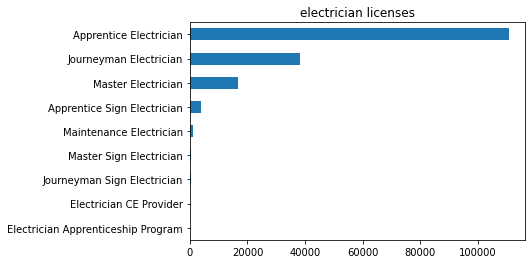

In [139]:
df.LICTYPE[df['electrician'] == True].value_counts(ascending=True).plot(kind='barh', title='electrician licenses')

## 12. How many sign electricians are there?

There are a few ways to do this one.

In [142]:
df['LICTYPE'].str.contains("Sign Electrician").value_counts()

False    585802
True       4927
Name: LICTYPE, dtype: int64

# PART THREE: LOOKING AT LAST NAMES

## 13. Extract every owner's last name

You want everything before the comma. We've done this before (in a few different ways!).

* **Hint:** If you get an error about missing or `NaN` data, you might use `.fillna('')` to replace every empty owner name with an empty string. This might not happen to you, though, depending on how you do it!

* **Hint:** You probably want to do `expand=False` on your extraction to make sure it comes out as a series instead of a dataframe.

In [143]:
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,electrician
0,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,False
1,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,False
2,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,False
3,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,False
4,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,2017-05-04,"THOMPSON, RANDY D",10995 BELLEVILLE RD,NaN,RINGLING OK 73456,0999,OUT OF STATE,73456,5802765961,NaN,N,False


In [152]:
df['OWNER'].str.split(',').str[0] 

0         WILLIAMS
1          GUEVARA
2           BOWERS
3           DEMSKY
4         THOMPSON
            ...   
597810        ABEL
597811        GRAY
597812       MAYER
597813     FRIESEN
597814       BAUER
Name: OWNER, Length: 597815, dtype: object

## 14. Save the last name into a new column

Then check to make sure it exists, and you successfully saved it into the dataframe.

In [153]:
df['LAST_NAME'] = df['OWNER'].str.split(',').str[0] 

In [154]:
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,electrician,LAST_NAME
0,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",...,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,False,WILLIAMS
1,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",...,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,False,GUEVARA
2,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",...,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,False,BOWERS
3,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",...,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,False,DEMSKY
4,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,2017-05-04,"THOMPSON, RANDY D",...,NaN,RINGLING OK 73456,0999,OUT OF STATE,73456,5802765961,NaN,N,False,THOMPSON


# 15. What are the ten most popular last names?

In [156]:
df.LAST_NAME.value_counts().head(10)

NGUYEN       22286
TRAN          8137
LE            5606
GARCIA        5574
MARTINEZ      4701
RODRIGUEZ     4626
HERNANDEZ     4390
PHAM          3997
GONZALEZ      3634
SMITH         3208
Name: LAST_NAME, dtype: int64

## 16. What are the most popular licenses for people with the last name Nguyen? Tran? Le?

Those are the top 3 last names in Vietnam.

In [160]:
df.LICTYPE[df['LAST_NAME'] == "NGUYEN"].value_counts().head(1)

Cosmetology Manicurist    12856
Name: LICTYPE, dtype: int64

In [161]:
df.LICTYPE[df['LAST_NAME'] == "TRAN"].value_counts().head(1)

Cosmetology Manicurist    4675
Name: LICTYPE, dtype: int64

In [162]:
df.LICTYPE[df['LAST_NAME'] == "LE"].value_counts().head(1)

Cosmetology Manicurist    3277
Name: LICTYPE, dtype: int64

The background of this [is interesting](https://www.npr.org/2019/05/19/724452398/how-vietnamese-americans-took-over-the-nails-business-a-documentary) and [tragic](https://www.nytimes.com/2015/05/10/nyregion/at-nail-salons-in-nyc-manicurists-are-underpaid-and-unprotected.html).

In [ ]:
# thank you for including this^^ info!!

## 17. Now do all of that in one line - most popular licenses for Nguyen, Tran and Le - without using `&`

In [177]:
df.LICTYPE[(df['LAST_NAME'] == "LE") | (df['LAST_NAME'] == "TRAN") | (df['LAST_NAME'] == "NGUYEN")].value_counts().head(1)

Cosmetology Manicurist    20808
Name: LICTYPE, dtype: int64

## 19. Most popular license for anyone with a last name that ENDS in `-ko`

The answer is not `.str.contains('ko')`, but it isn't necessarily too different.

* One way involves a `.str.` method that check if a string ends with something,
* the other way involves a regular expression that has a "end of the string" marker (similar to how we've used `^` for the start of a string before)

If you're thinking about the latter, I might take a look at [this page](http://www.rexegg.com/regex-quickstart.html) under "Anchors and Boundaries". 

In [6]:
import re

In [212]:
# or can do
# df['LAST_NAME'].str.lower().str.endswith('ko')
df.LICTYPE[df.LAST_NAME.str.endswith("KO", na=False)].value_counts().head(1)

Cosmetology Operator    67
Name: LICTYPE, dtype: int64

## 20. Get that as a percentage

In [213]:
df.LICTYPE[df.LAST_NAME.str.endswith("KO", na=False)].value_counts(normalize = True) * 100

Cosmetology Operator                            36.021505
Apprentice Electrician                          12.365591
Journeyman Electrician                           8.602151
Legal Service Contract Sales Rep                 5.913978
A/C Technician                                   5.913978
Cosmetology Esthetician                          4.838710
Master Electrician                               3.763441
Cosmetology Hair Braider                         3.763441
Cos Mini Salon                                   2.688172
Cosmetology Operator Instructor                  2.150538
Cosmetology Manicurist                           2.150538
Maintenance Electrician                          1.612903
Barber, Class A                                  1.612903
Tow Truck Operator (Incident Management)         1.075269
A/C Contractor                                   1.075269
Apprentice Sign Electrician                      0.537634
Property Tax Appraiser                           0.537634
Barber Hair Br

# PART FOUR: LOOKING AT FIRST NAMES

## 21. Extract the owner's first name

First, a little example of how regular expressions work with pandas.

In [214]:
# Build a dataframe
sample_df = pd.DataFrame([
    { 'name': 'Mary', 'sentence': "I am 90 years old" },
    { 'name': 'Jack', 'sentence': "I am 4 years old" },
    { 'name': 'Anne', 'sentence': "I am 27 years old" },
    { 'name': 'Joel', 'sentence': "I am 13 years old" },
])
# Look at the dataframe
sample_df

,name,sentence
0,Mary,I am 90 years old
1,Jack,I am 4 years old
2,Anne,I am 27 years old
3,Joel,I am 13 years old


In [215]:
# Given the sentence, "I am X years old", extract digits from the middle using ()
# Anything you put in () will be saved as an output.
# If you do expand=True it makes you a dataframe, but we don't want that.
sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)

0    90
1     4
2    27
3    13
Name: sentence, dtype: object

In [216]:
# Save it into a new column
sample_df['age'] = sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)
sample_df.head()

,name,sentence,age
0,Mary,I am 90 years old,90
1,Jack,I am 4 years old,4
2,Anne,I am 27 years old,27
3,Joel,I am 13 years old,13


**Now let's think about how we're going to extract the first names.** Begin by looking at a few full names.

In [217]:
df['OWNER'].head(10)

0         WILLIAMS, JON ANDRE
1       GUEVARA, JUAN ANTONIO
2    BOWERS, JAMES BRISCOE II
3         DEMSKY, JOHN EDWARD
4           THOMPSON, RANDY D
5          TUCKER, MONTE EARL
6        COOPER, THOMAS JAMES
7     BLANKENSHIP, KERRY NEIL
8      DAWES, NICHOLAS MORGAN
9        LESTER, TIMMY EUGENE
Name: OWNER, dtype: object

What can you use to find the first name? It helps to say "this is to the left and this is to the right, and I'm going to take anything in the middle."

Once you figure out how to extract it, you can do a `.head(10)` to just look at the first few.

In [218]:
df['OWNER'].str.extract("\w+, (\w+.*$)", expand=False)

0                JON ANDRE
1             JUAN ANTONIO
2         JAMES BRISCOE II
3              JOHN EDWARD
4                  RANDY D
                ...       
597810            JUSTIN C
597811       MATTHEW BRYAN
597812             DAVID W
597813      FRANCISCO FEHR
597814             DAVID A
Name: OWNER, Length: 597815, dtype: object

## 22. Saving the owner's first name

Save the name to a new column, `FIRSTNAME`.

In [8]:
df['FIRSTNAME'] = df['OWNER'].str.extract("\w+, (\w+.*$)", expand=False)
df.FIRSTNAME.head(10)

0           JON ANDRE
1        JUAN ANTONIO
2    JAMES BRISCOE II
3         JOHN EDWARD
4             RANDY D
5          MONTE EARL
6        THOMAS JAMES
7          KERRY NEIL
8     NICHOLAS MORGAN
9        TIMMY EUGENE
Name: FIRSTNAME, dtype: object

# 23. Examine everyone without a first name

I purposefully didn't do a nicer regex in order to have some screwed-up results. **How many people are there without an entry in the first name column?**

Your numbers might be different than mine.

In [265]:
df.FIRSTNAME.isnull().value_counts()

False    512216
True      85599
Name: FIRSTNAME, dtype: int64

What do their names look like?

In [266]:
df.FIRSTNAME[df['FIRSTNAME'].isnull() == True]

147       NaN
498       NaN
602       NaN
817       NaN
879       NaN
         ... 
595509    NaN
595551    NaN
595593    NaN
595600    NaN
595678    NaN
Name: FIRSTNAME, Length: 85599, dtype: object

## 24. If it's a problem, you can fix it (if you'd like!)

Maybe you have another regular expression that works better with JUST these people? It really depends on how you've put together your previous regex!

If you'd like to use a separate regex for this group, you can use code like this:

`df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = .....`

That will only set the `FIRSTNAME` for people where `FIRSTNAME` is null.

In [9]:
# trying to fix first names for people with LASTNAME*space*, FIRSTNAME(s)
df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = df['FIRSTNAME'].str.extract("\w+ , (\w+.*$)", expand=False)

How many empty first names do we have now?

In [273]:
df.FIRSTNAME.isnull().value_counts()

False    512216
True      85599
Name: FIRSTNAME, dtype: int64

My code before only worked for people with middle names, but now it got people without middle names, too. Looking much better!

## 25. Most popular first names?

In [275]:
df.FIRSTNAME.value_counts().head()

DAVID      1197
JOSE A     1058
JOSE       1033
DANIEL      985
MICHAEL     817
Name: FIRSTNAME, dtype: int64

## 26. Most popular first names for a Cosmetology Operator, Cosmetology Esthetician, Cosmetologist, and anything that seems similar?

If you get an error about "cannot index vector containing NA / NaN values" remember `.fillna(False)` or `na=False` - if a row doesn't have a license, it doesn't give a `True`/`False`, so we force all of the empty rows to be `False`.

In [300]:
df.FIRSTNAME[df.LICTYPE.str.contains("Cosmet", na=False)].value_counts().head()

MARIA        662
ELIZABETH    507
JESSICA      492
JENNIFER     477
VERONICA     361
Name: FIRSTNAME, dtype: int64

## 27. Most popular first names for anything involving electricity?

In [301]:
df.FIRSTNAME[df.LICTYPE.str.contains("Electric", na=False)].value_counts().head()

JOSE A    839
JOSE      708
DAVID     691
DANIEL    668
JOSE L    523
Name: FIRSTNAME, dtype: int64

## 28. Can we be any more obnoxious in this assignment?

A terrible thing that data analysts are often guilty of is using names to make assumptions about people. Beyond stereotypes involving last names, first names are often used to predict someone's race, ethnic background, or gender.

And if that isn't bad enough: if we were looking for Python libraries to do this sort of analysis, we'd come across [sex machine](https://github.com/ferhatelmas/sexmachine/). Once upon a time there was Ruby package named sex machine and everyone was like "come on are you six years old? is this how we do things?" and the guy was like "you're completely right I'm renaming it to [gender detector](https://github.com/bmuller/gender_detector)" and the world was Nice and Good again.

How'd it happen? [On Github, in a pull request!](https://github.com/bmuller/gender_detector/pull/14) Neat, right?

But yeah: apparently Python didn't get the message.

The sexmachine package doesn't work on Python 3 because it's from 300 BC, so we're going to use a Python 3 fork with the less problematic name [gender guesser](https://pypi.python.org/pypi/gender-guesser/).

#### Use `pip` or `pip3` to install gender-guesser.

In [10]:
!pip install gender-guesser

You are using pip version 10.0.1, however version 20.3b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


#### Run this code to test to see that it works

In [11]:
import gender_guesser.detector as gender

detector = gender.Detector(case_sensitive=False)
detector.get_gender('David')

'male'

In [304]:
detector.get_gender('Jose')

'male'

In [305]:
detector.get_gender('Maria')

'female'

#### Use it on a dataframe

To use something fancy like that on a dataframe, you use `.apply`. Check it out: 

In [314]:
df['FIRSTNAME'].fillna('').apply(lambda name: detector.get_gender(name)).head()

0    unknown
1    unknown
2    unknown
3    unknown
4    unknown
Name: FIRSTNAME, dtype: object

## 29. Calculate the gender of everyone's first name and save it to a column

Confirm by see how many people of each gender we have

In [316]:
df['gender'] = df['FIRSTNAME'].fillna('').apply(lambda name: detector.get_gender(name))

In [317]:
df.gender.value_counts()

unknown          486116
male              55308
female            45273
mostly_female      4720
mostly_male        4167
andy               2231
Name: gender, dtype: int64

## 30. We like our data to be in tidy binary categories

* Combine the `mostly_female` into `female` 
* Combine the `mostly_male` into `male`
* Replace `andy` (androgynous) and `unknown` with `NaN`

you can get NaN not by making a string, but with `import numpy as np` and then using `np.nan`.

In [327]:
import numpy as np

In [347]:
df['gender'] = df['gender'].replace('mostly_female', 'female')
df['gender'] = df['gender'].replace('mostly_male', 'male')
df['gender'] = df['gender'].replace('andy', np.nan)
df['gender'] = df['gender'].replace('unknown', np.nan)

df.gender.value_counts()

np.nan    488347
male       59475
female     49993
Name: gender, dtype: int64

## 31. Do men or women have more licenses? What is the percentage of unknown genders?

In [348]:
df.gender.value_counts()

np.nan    488347
male       59475
female     49993
Name: gender, dtype: int64

In [349]:
df.gender.value_counts(normalize=True) * 100

np.nan    81.688649
male       9.948730
female     8.362621
Name: gender, dtype: float64

## 32. What are the popular unknown- or ambiguous gender first names?

Yours might be different! Mine is a combination of actual ambiguity, cultural bias and dirty data.

In [355]:
df.FIRSTNAME[df.gender == 'np.nan'].value_counts().head()

JOSE A       1058
INC           697
JOSE L        676
LLC           602
MICHAEL A     583
Name: FIRSTNAME, dtype: int64

## 33. Manually check a few, too 

Using [a list of "gender-neutral baby names"](https://www.popsugar.com/family/Gender-Neutral-Baby-Names-34485564), pick a few names and check what results the library gives you.

In [376]:
df.gender[df['FIRSTNAME'] == "SAM"].head(10)

3161      male
6878      male
22899     male
24918     male
26974     male
64264     male
75001     male
75878     male
102672    male
103964    male
Name: gender, dtype: object

In [375]:
df.gender[df['FIRSTNAME'] == "CAMERON"].head(10)

11843     male
15263     male
19132     male
24666     male
85507     male
86481     male
92199     male
95136     male
97867     male
100912    male
Name: gender, dtype: object

## 34. What are the most popular licenses for men? For women?

In [378]:
df.LICTYPE[df['gender'] == "male"].value_counts().head()

Apprentice Electrician    26872
A/C Technician             6718
Journeyman Electrician     5283
Cosmetology Operator       3504
Barber, Class A            3111
Name: LICTYPE, dtype: int64

In [379]:
df.LICTYPE[df['gender'] == "female"].value_counts().head()

Cosmetology Operator       33371
Cosmetology Esthetician     4732
Cosmetology Manicurist      3948
Apprentice Electrician      1441
Barber, Class A             1203
Name: LICTYPE, dtype: int64

## 35. What is the gender breakdown for Property Tax Appraiser? How about anything involving Tow Trucks?

If you're in need, remember your good friend `.fillna(False)` to get rid of NaN values, or `.na=False` with `.str.contains`.

In [381]:
df.gender[df.LICTYPE == "Property Tax Appraiser"].value_counts()


np.nan    2586
female     136
male       124
Name: gender, dtype: int64

In [383]:
df.gender[df.LICTYPE.str.contains("Tow Truck", na=False)].value_counts()

np.nan    11016
male       3683
female      213
Name: gender, dtype: int64

(By the way, what are those tow truck jobs?)

In [385]:
df.LICTYPE[df.LICTYPE.str.contains("Tow Truck", na=False)]

570343            Tow Truck Operator (Consent Tow)
570344    Tow Truck Operator (Incident Management)
570345            Tow Truck Operator (Consent Tow)
570346    Tow Truck Operator (Incident Management)
570347    Tow Truck Operator (Incident Management)
                            ...                   
585250    Tow Truck Operator (Incident Management)
585251    Tow Truck Operator (Incident Management)
585252            Tow Truck Operator (Consent Tow)
585253            Tow Truck Operator (Consent Tow)
585254    Tow Truck Operator (Incident Management)
Name: LICTYPE, Length: 14912, dtype: object

## 33. Graph them!

And let's **give them titles** so we know which is which.

<AxesSubplot:title={'center':'Gender of Texas tax appraisers'}>

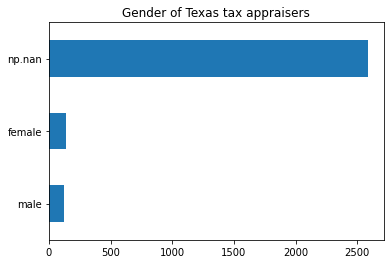

In [391]:
df.gender[df.LICTYPE == "Property Tax Appraiser"].value_counts(ascending=True).plot(kind='barh', title='Gender of Texas tax appraisers')

<AxesSubplot:title={'center':'Gender of Texans working with tow trucks'}>

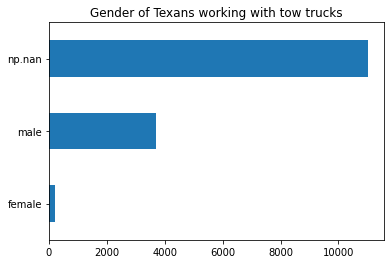

In [390]:
df.gender[df.LICTYPE.str.contains("Tow Truck", na=False)].value_counts(ascending=True).plot(kind='barh', title='Gender of Texans working with tow trucks')

## 34. Calcuate the supposed gender bias for profession

I spent like an hour on this and then realized a super easy way to do it. Welcome to programming! I'll do this part for you.

In [393]:
# So when you do .value_counts(), it gives you an index and a value
df[df['gender'] == 'male'].LICTYPE.value_counts().head()

Apprentice Electrician    26872
A/C Technician             6718
Journeyman Electrician     5283
Cosmetology Operator       3504
Barber, Class A            3111
Name: LICTYPE, dtype: int64

We did `pd.concat` to combine dataframes, but you can also use it to combine series (like the results of `value_counts()`). If you give it a few `value_counts()` and give it some column names it'll make something real nice.

In [22]:
# All of the values_counts() we will be combining
vc_series = [
    df[df['gender'] == 'male'].LICTYPE.value_counts(),
    df[df['gender'] == 'female'].LICTYPE.value_counts(),
    df[df['gender'].isnull()].LICTYPE.value_counts()
]
# You need axis=1 so it combines them as columns
gender_df = pd.concat(vc_series, axis=1)
gender_df.head()

,LICTYPE,LICTYPE,LICTYPE
Apprentice Electrician,26872.0,1441.0,82280
A/C Technician,6718.0,221.0,21020
Journeyman Electrician,5283.0,143.0,32744
Cosmetology Operator,3504.0,33371.0,114331
"Barber, Class A",3111.0,1203.0,11705


In [23]:
# Turn "A/C Contractor" etc into an actual column instead of an index
gender_df.reset_index(inplace=True)
gender_df.head()

,index,LICTYPE,LICTYPE,LICTYPE
0,Apprentice Electrician,26872.0,1441.0,82280
1,A/C Technician,6718.0,221.0,21020
2,Journeyman Electrician,5283.0,143.0,32744
3,Cosmetology Operator,3504.0,33371.0,114331
4,"Barber, Class A",3111.0,1203.0,11705


In [24]:
# Rename the columns appropriately
gender_df.columns = ["license", "male", "female", "unknown"]
# Clean up the NaN by replacing them with zeroes
gender_df.fillna(0, inplace=True)
gender_df.head()

,license,male,female,unknown
0,Apprentice Electrician,26872.0,1441.0,82280
1,A/C Technician,6718.0,221.0,21020
2,Journeyman Electrician,5283.0,143.0,32744
3,Cosmetology Operator,3504.0,33371.0,114331
4,"Barber, Class A",3111.0,1203.0,11705


## 35. Add new columns for total licenses, percent known (not percent unknown!), percent male (of known), percent female (of known)

And replace any `NaN`s with `0`.

In [52]:
gender_df['total_licenses'] = gender_df['male'] + gender_df['female'] + gender_df['unknown']
gender_df['percent_known'] = 100 * (1 - (gender_df['unknown'] / gender_df['total_licenses']))
gender_df['percent_male'] = 100 * (gender_df['male'] / (gender_df['male'] + gender_df['female']))
gender_df['percent_female'] = 100 * (gender_df['female'] / (gender_df['male'] + gender_df['female']))

In [54]:
gender_df.fillna(0, inplace=True)
gender_df.head()

,license,male,female,unknown,test,total_licenses,percent_known,percent_male,percent_female
0,Apprentice Electrician,26872.0,1441.0,82280,9039187899,110593.0,25.601078,94.910465,5.089535
1,A/C Technician,6718.0,221.0,21020,0,27959.0,24.818484,96.815103,3.184897
2,Journeyman Electrician,5283.0,143.0,32744,7136445566,38170.0,14.215352,97.364541,2.635459
3,Cosmetology Operator,3504.0,33371.0,114331,2549852228,151206.0,24.387260,9.502373,90.497627
4,"Barber, Class A",3111.0,1203.0,11705,5802765961,16019.0,26.930520,72.114047,27.885953


## 35. What 10 licenses with more than 2,000 people and over 75% "known" gender has the most male owners? The most female?

In [71]:
# I know this is asking for licenses that are over 75% known, but the code didn't return any results!
gender_df.license[(gender_df.total_licenses > 2000) & (gender_df.percent_male > 75)].groupby(gender_df.percent_male).value_counts().head(10)

percent_male  license                                 
79.218750     Used Auto Parts Recycler Employee           1
80.588235     Auctioneer                                  1
92.124105     Dual Towing Operator(IM)/VSF Employee       1
94.142043     Tow Truck Operator (Incident Management)    1
94.779478     Apprentice Sign Electrician                 1
94.910465     Apprentice Electrician                      1
95.061073     Tow Truck Operator (Consent Tow)            1
96.815103     A/C Technician                              1
97.364541     Journeyman Electrician                      1
97.627737     Master Electrician                          1
Name: license, dtype: int64

In [72]:
gender_df.license[(gender_df.total_licenses > 2000) & (gender_df.percent_female > 75)].groupby(gender_df.percent_female).value_counts().head(10)


percent_female  license                        
87.253142       Cosmetology Operator Instructor    1
90.497627       Cosmetology Operator               1
91.421857       Cosmetologist                      1
93.740095       Cosmetology Esthetician            1
100.000000      Cos Mini Salon                     1
Name: license, dtype: int64

## 36. Let's say you have to call a few people about being in a profession dominated by the other gender. What are their phone numbers?

This will involve doing some research in one dataframe, then the other one. I didn't put an answer here because I'm interested in what you come up with!

In [85]:
gender_df.license[gender_df.percent_male > 50]
# the first one listed is Apprentice Electrician

0                           Apprentice Electrician
1                                   A/C Technician
2                           Journeyman Electrician
4                                  Barber, Class A
5         Tow Truck Operator (Incident Management)
6                 Tow Truck Operator (Consent Tow)
7                               Master Electrician
9                 Legal Service Contract Sales Rep
10                     Apprentice Sign Electrician
11           Dual Towing Operator(IM)/VSF Employee
12               Used Auto Parts Recycler Employee
14                             Residential Wireman
16               Water Well Driller/Pump Installer
17                             Appliance Installer
19                                      Auctioneer
20                         Property Tax Consultant
21                         Maintenance Electrician
23           Tow Truck Operator (Private Property)
25             Registered Accessibility Specialist
26                             

In [89]:
df.TELEPHONE[df.LICTYPE == 'Apprentice Electrician'].head()

47024    9798284713
47025    2104887491
47026    7133824802
47027    9035634950
47028    9039462547
Name: TELEPHONE, dtype: object

## Okay, let's take a break for a second.

We've been diving pretty deep into this gender stuff after an initial "oh but it's not great" kind of thing.

**What issues might come up with our analysis?** Some might be about ethics or discrimination, while some might be about our analysis being misleading or wrong. Go back and take a critical look at what we've done since we started working on gender, and summarize your thoughts below.

If you found problems with our analysis, **how could we make improvements?**

In [ ]:
# We're analyzing an incomplete data set because it doesn't have a full gender breakdown per license type
# so the conclusions we're drawing aren't based on the full picture.
# Also, the data classifies gender as male and female, which is an outdated binary. Some people might not consider themselves male or female

In [ ]:
# It seems like the jobs that need licenses in Texas are a bit more blue-collar, 
# so this doesn't show a full-picture of Texas' workforce

## PART FIVE: Violations

### 37. Read in **violations.csv** as `violations_df`, make sure it looks right

In [90]:
violations_df = pd.read_csv("violations.csv")

In [91]:
violations_df.head()

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode
0,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083
1,Respondent failed to keep a record of the date...,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,3/21/2017,77072
2,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066
3,Respondent failed to keep a record of the date...,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penal...,3/8/2017,77083
4,The Respondent's license was revoked upon Resp...,HOUSTON,COS20170005470,HARRIS,1209580,"NGUYEN, QUAN M",Respondent's Cosmetology Operator license was ...,2/24/2017,77077


### 38. Combine with your original licenses dataset dataframe to get phone numbers and addresses for each violation. Check that it is 90 rows, 28 columns.

In [98]:
df3 = pd.merge(df, violations_df, left_on=['LICNUMBER'], right_on=['licenseno'], how='right')
df3

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,gender,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode
0,Cosmetology Esthetician/Manicure Salon,748459,HARRIS,FORMAL NAILS,NaN,NaN,NaN,NaN,2018-01-29,FORMAL NAILS,...,NaN,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083
1,Cosmetology Esthetician/Manicure Salon,742837,HARRIS,LUU LUU NAILS & SPA,NaN,NaN,NaN,NaN,2019-02-17,LUU LUU NAILS & SPA,...,NaN,Respondent failed to keep a record of the date...,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,3/21/2017,77072
2,Cosmetology Esthetician/Manicure Salon,742837,HARRIS,LUU LUU NAILS & SPA,NaN,NaN,NaN,NaN,2019-02-17,LUU LUU NAILS & SPA,...,NaN,"Respondent failed to disinfect tools, implemen...",HOUSTON,COS20160018700,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,11/30/2016,77072
3,Cosmetology Esthetician/Manicure Salon,729680,HARRIS,FANCY NAILS,NaN,NaN,NaN,NaN,2018-08-31,FANCY NAILS,...,NaN,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066
4,Cosmetology Beauty Salon,688518,HARRIS,1 HOLLYWOOD NAILS,NaN,NaN,NaN,NaN,2019-01-31,1 HOLLYWOOD NAILS,...,NaN,Respondent failed to keep a record of the date...,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penal...,3/8/2017,77083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Cosmetology Esthetician/Manicure Salon,724124,HARRIS,HAPPY NAILS SPA,NaN,NaN,NaN,NaN,2016-04-28,HAPPY NAILS SPA,...,NaN,Respondent operated a cosmetology salon with a...,HOUSTON,COS20140020041,HARRIS,724124,"NGUYEN, THANH N",Respondent is assessed an administrative penal...,9/4/2014,77075
111,Cosmetology Manicure Salon,738145,HARRIS,SANY'S NAIL,NaN,NaN,NaN,NaN,2018-02-28,SANY'S NAIL,...,NaN,"Respondent failed to clean, disinfect, and ste...",HOUSTON,COS20140016481,HARRIS,738145,"NGUYEN, KIM DUNG THI",Respondent is assessed an administrative penal...,9/29/2014,77087
112,Cosmetology Esthetician/Manicure Salon,721462,HARRIS,LEAN NAILS,NaN,NaN,NaN,NaN,2017-04-29,LEAN NAILS,...,NaN,Respondent possessed an electric drill other t...,HOUSTON,COS20130017246,HARRIS,721462,"NGUYEN, KHOAN VIET",Respondent is assessed an administrative penal...,9/9/2014,77061
113,Cosmetology Esthetician/Manicure Salon,743316,HARRIS,RED APPLE NAILS,NaN,NaN,NaN,NaN,2017-02-11,RED APPLE NAILS,...,NaN,Respondent failed to keep a record of the date...,HOUSTON,COS20130020057,HARRIS,743316,"NGUYEN, HANG THI",Respondent is assessed an administrative penal...,9/8/2014,77021


## 39. Find each violation involving a failure with records. Use a regular expression.

In [104]:
df3.basis

0      Respondent failed to keep a record of the date...
1      Respondent failed to keep a record of the date...
2      Respondent failed to disinfect tools, implemen...
3      Respondent failed to maintain the required cle...
4      Respondent failed to keep a record of the date...
                             ...                        
110    Respondent operated a cosmetology salon with a...
111    Respondent failed to clean, disinfect, and ste...
112    Respondent possessed an electric drill other t...
113    Respondent failed to keep a record of the date...
114    Respondent failed to clean, disinfect, and ste...
Name: basis, Length: 115, dtype: object

In [108]:
df3['basis'].str.extract("(Respondent failed to keep a record of the date.*$)", expand=False)

0      Respondent failed to keep a record of the date...
1      Respondent failed to keep a record of the date...
2                                                    NaN
3                                                    NaN
4      Respondent failed to keep a record of the date...
                             ...                        
110                                                  NaN
111                                                  NaN
112                                                  NaN
113    Respondent failed to keep a record of the date...
114    Respondent failed to keep a record of the date...
Name: basis, Length: 115, dtype: object

## 40. How much money was each fine? Use a regular expression and .str.extract

Unfortunately large and helpful troubleshooting tip: `$` means "end of a line" in regex, so `.extract` isn't going to accept it as a dollar sign. You need to escape it by using `\$` instead.

In [111]:
df3.order

0      Respondent is assessed an administrative penal...
1      Respondent is assessed an administrative penal...
2      Respondent is assessed an administrative penal...
3      Respondent is assessed an administrative penal...
4      Respondent is assessed an administrative penal...
                             ...                        
110    Respondent is assessed an administrative penal...
111    Respondent is assessed an administrative penal...
112    Respondent is assessed an administrative penal...
113    Respondent is assessed an administrative penal...
114    Respondent is assessed an administrative penal...
Name: order, Length: 115, dtype: object

In [151]:
df3['fine'] = df3['order'].str.extract("Respondent is assessed an administrative penalty in the amount of \$(\d.*\d).", expand=False)

In [152]:
df3.fine.head(10)

0      300
1      500
2      750
3    1,875
4      375
5      NaN
6    1,800
7    1,125
8      750
9      750
Name: fine, dtype: object

In [153]:
df3.fine.value_counts()

750      24
500      17
375      10
1,500     9
1,000     8
250       5
1,125     5
575       3
875       3
625       3
225       2
1,250     2
150       2
550       2
975       1
850       1
300       1
2,200     1
2,250     1
1,600     1
600       1
4,000     1
925       1
1,695     1
3,750     1
400       1
1,150     1
1,800     1
1,625     1
1,650     1
1,875     1
Name: fine, dtype: int64

## 41. Clean those results (no commas, no dollar signs, and it should be an integer) and save it to a new column called `fine`

`.replace` is for *entire cells*, you're interested in `.str.replace`, which treats each value like a string, not like a... pandas thing.

`.astype(int)` will convert it into an integer for you.

In [161]:
df3['fine'] = df3['fine'].str.replace(',', '')

In [162]:
df3.fine.fillna(0, inplace=True)

In [164]:
df3.fine.astype(int)

0       300
1       500
2       750
3      1875
4       375
       ... 
110     150
111     575
112     500
113    1000
114    1250
Name: fine, Length: 115, dtype: int64

## 42. Which orders results in the top fines?

In [174]:
df3.basis[df3.fine.value_counts().head()]

24    Respondent failed to keep a record of the date...
17    Respondent failed to disinfect tools, implemen...
10    Respondent performed or attempted to perform a...
9     Respondent performed or attempted to perform a...
8     Respondent failed to keep a record of the date...
Name: basis, dtype: object

## 43. Are you still here???

I'm sure impressed.